In [1]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from pprint import pprint as pp

In [2]:
!python -V

Python 3.10.0


## Загружаем датасет

In [3]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Damir\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal positio

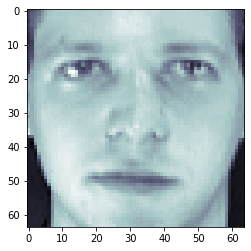

In [4]:
plt.imshow(faces.images[0], cmap=plt.cm.bone)

In [5]:
faces.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

## Берем за Х наши данные, а за Y людей

In [6]:
X = faces['data']
Y = faces['target']

In [7]:
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [8]:
Y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

## Разделяем выборку

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    train_size=0.80,
                                                    random_state=42,
                                                    stratify=Y)

In [10]:
y_train

array([13,  5,  3, 12, 10, 20, 24, 35, 11, 13,  1,  9, 20, 37,  1, 20, 35,
       32, 36, 33, 16, 33, 19,  7, 23, 33, 10, 36, 19, 13, 15, 22, 34, 12,
        8,  0,  8, 34, 32, 28, 34,  6,  3, 31, 21, 21, 38, 13,  8, 12, 25,
       34,  5, 26, 33, 16,  4, 37, 20, 35, 20,  8,  3,  6,  9, 30,  4, 31,
       18,  0, 16,  9, 25, 37, 18, 38,  1, 10, 39,  5, 31, 24,  7, 28, 14,
       32, 33, 25,  3, 31, 39, 32, 10, 30, 18,  9,  3,  8,  1, 24, 31,  7,
       15, 22, 39, 28,  7, 16, 24, 26, 20, 26, 26, 39,  3, 17, 16, 26, 27,
       29, 30, 14, 32, 38, 25, 36, 38, 21, 36, 34, 30, 19,  2, 28,  9, 29,
       27, 16, 13, 14, 38, 24,  0, 28, 10,  4, 16, 39, 38, 29, 17, 25,  5,
        5,  9,  8,  8,  1, 22, 28, 29, 27, 18, 10, 19, 37,  0,  9,  2, 25,
        0, 24, 33, 26, 29, 17, 26, 22, 25,  1, 27, 32,  4, 12, 35, 10, 35,
       31, 35, 30, 25,  3, 23, 10, 22, 29, 19,  9, 24, 11,  2,  8, 37, 23,
       23,  1, 28, 30, 11,  5, 14, 15, 11,  4,  0, 15, 28, 16, 17, 17, 36,
        2,  7, 14, 27, 11

## Создаем модель и обучаем ее

In [11]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

## Делаем предсказания

In [12]:
y_pred = clf.predict(X_test)

In [13]:
y_pred

array([ 1, 35, 18, 16, 39, 23, 32, 19, 39, 34, 25, 27, 39, 29,  7, 35, 21,
       34, 11, 36, 26, 19, 22, 22, 38, 10, 31, 12, 10,  5, 27, 38, 15, 21,
       37, 25, 20, 14, 39,  0, 12,  2,  8,  2, 17, 30, 14, 23, 31,  6,  9,
       16,  4,  8, 37, 13, 32, 20, 18, 30, 33, 12, 29, 28, 33, 17,  3, 13,
       11, 36,  5, 28,  7,  1, 26, 34, 15,  7,  6, 24])

In [14]:
metrics.adjusted_mutual_info_score(y_test, y_pred)

0.8501585185038661

In [15]:
metrics.completeness_score(y_test, y_pred)

0.9762746213575001

## Метрики точности, полноты и оценка Ф1

In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [17]:
faces['images'][0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

## Обучаем другие модели

In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
models = [
    ("SVM", SVC()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("LR", LogisticRegression(max_iter=10000)),
    ("NB", GaussianNB()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("DT", DecisionTreeClassifier())
]

In [30]:
for name, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9375
Accuracy:  1.0
Accuracy:  0.975
Accuracy:  0.875
Accuracy:  0.85
Accuracy:  0.6375


## Смотрим на показатели оценки моделей при разных соотношениях тестовой-обучающей выборки

In [31]:
np.arange(20, 90, 15) / 100

array([0.2 , 0.35, 0.5 , 0.65, 0.8 ])

In [32]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

acc_pred = []
for i in np.arange(20, 90, 15) / 100:
    X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                        train_size=i,
                                                        random_state=42,
                                                        stratify=Y)
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    acc_pred.append(accuracy)
    # print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.71875
Accuracy:  0.6961538461538461
Accuracy:  0.84
Accuracy:  0.8785714285714286
Accuracy:  0.9375


## Строим график для наглядности

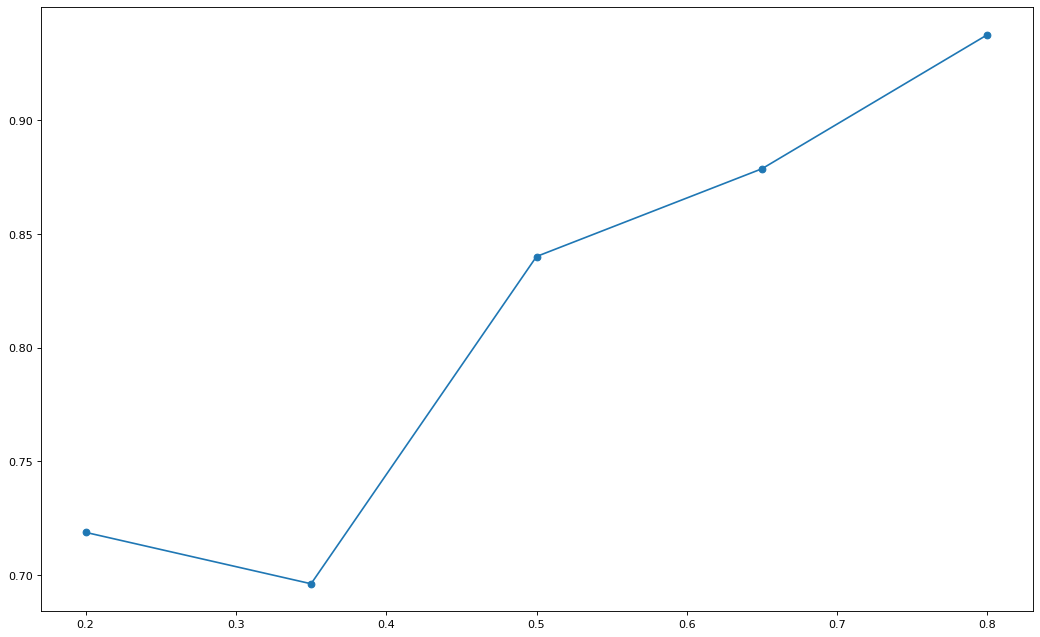

In [33]:

plt.figure(figsize=(16,10), dpi= 80)
plt.scatter(np.arange(20, 90, 15) / 100, acc_pred)
plt.plot(np.arange(20, 90, 15) / 100, acc_pred)
plt.show()

## Как мы видим чем больше тестовая выборка - тем лучше результат